#       --------------------------        House Price Prediction            -----------------------

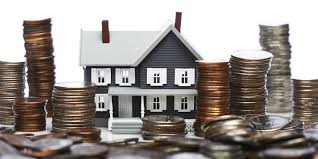

# Importing important libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
missing_values=["NAN","Nan","N/A","n/a","na","<NA>",np.nan] # DESCRIBING VALUES TO BE CONSIDERED AS NULL
TRAIN_DATA=pd.read_csv('train.csv',na_values=missing_values) # IMPORTING TRAIN_DATA=TRAINING DATA
TEST_DATA=pd.read_csv('test.csv',na_values=missing_values) # IMPORTING TEST_DATA=TEST DATA 
TRAIN_COL=TRAIN_DATA.columns 
TEST_COL=TEST_DATA.columns

## Observing the data types and columns

In [3]:
TRAIN_DATA.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
TEST_DATA.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
TRAIN_DATA.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
TEST_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
TRAIN_COL

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
TEST_COL

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
len(TRAIN_COL)

81

In [10]:
len(TEST_COL)

80

### IT CAN BE OBSERVED THAT THE TRAIN DATASET CONTAINS "SALEPRICE" AS ITS TARGET VARIABLE COLUMN BUT IT IS MISSING IN TEST DATA

# LET'S VISUALIZE THE DATA AND ANALYSE THE NULL VALUES

In [11]:
def hmapnull(dataset,COLUMNS):
    plt.figure(figsize=(10,400))
    k=1
    for i in range(0,len(COLUMNS)-5,5):
        plt.subplot(len(COLUMNS)/2,2,k)
        sns.heatmap(dataset.iloc[:,i:i+5].isnull(),xticklabels=True,cbar=False)
        k+=1
def cplotnull(DATA,COLM):
    j=1
    plt.figure(figsize=(15,90))
    for i in COLM:
        plt.subplot(27,3,j)
        plt.xlabel(i)
        plt.legend(i)
        sns.countplot(x=i, data=DATA.isnull())
        j+=1

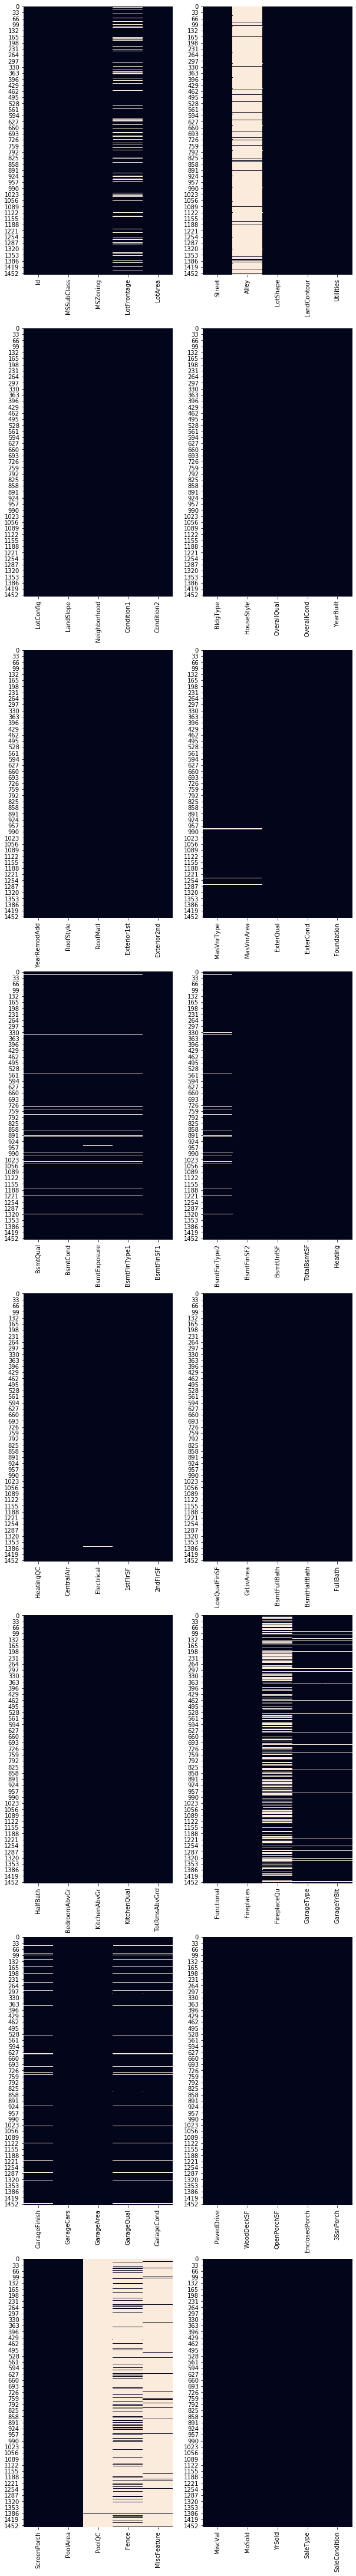

In [12]:
hmapnull(TRAIN_DATA,TRAIN_COL)

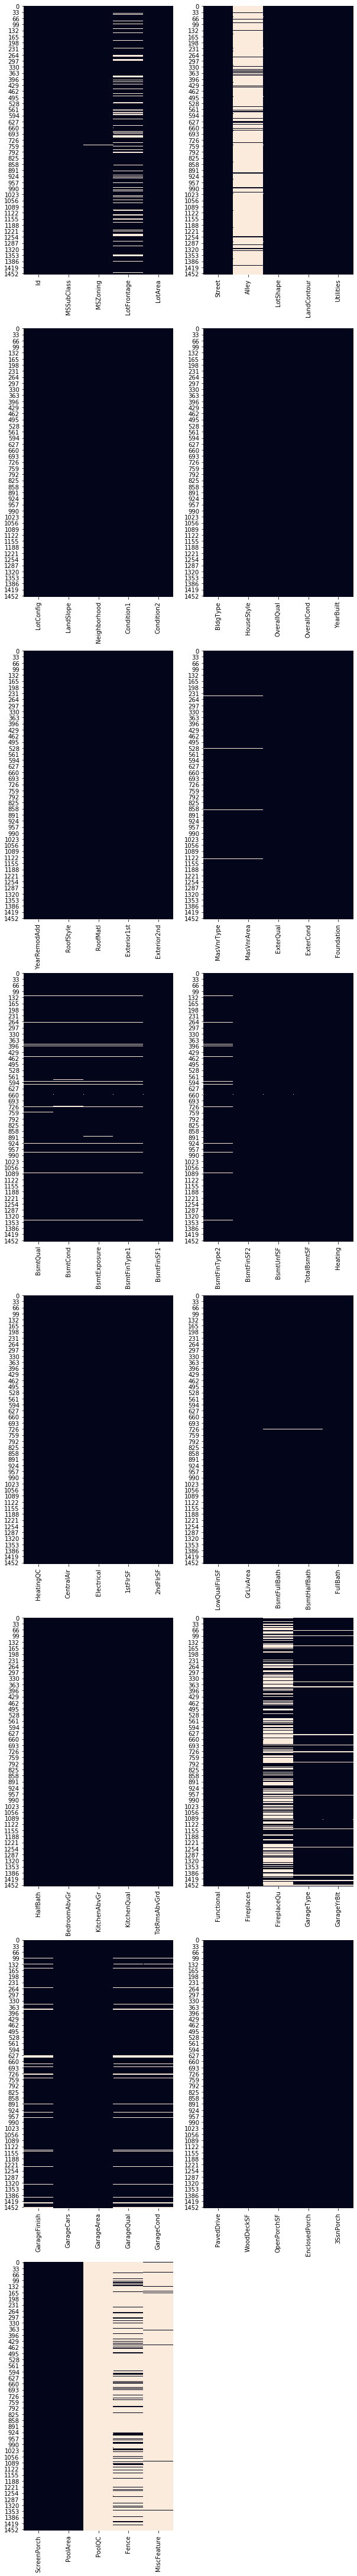

In [13]:
hmapnull(TEST_DATA,TEST_COL)

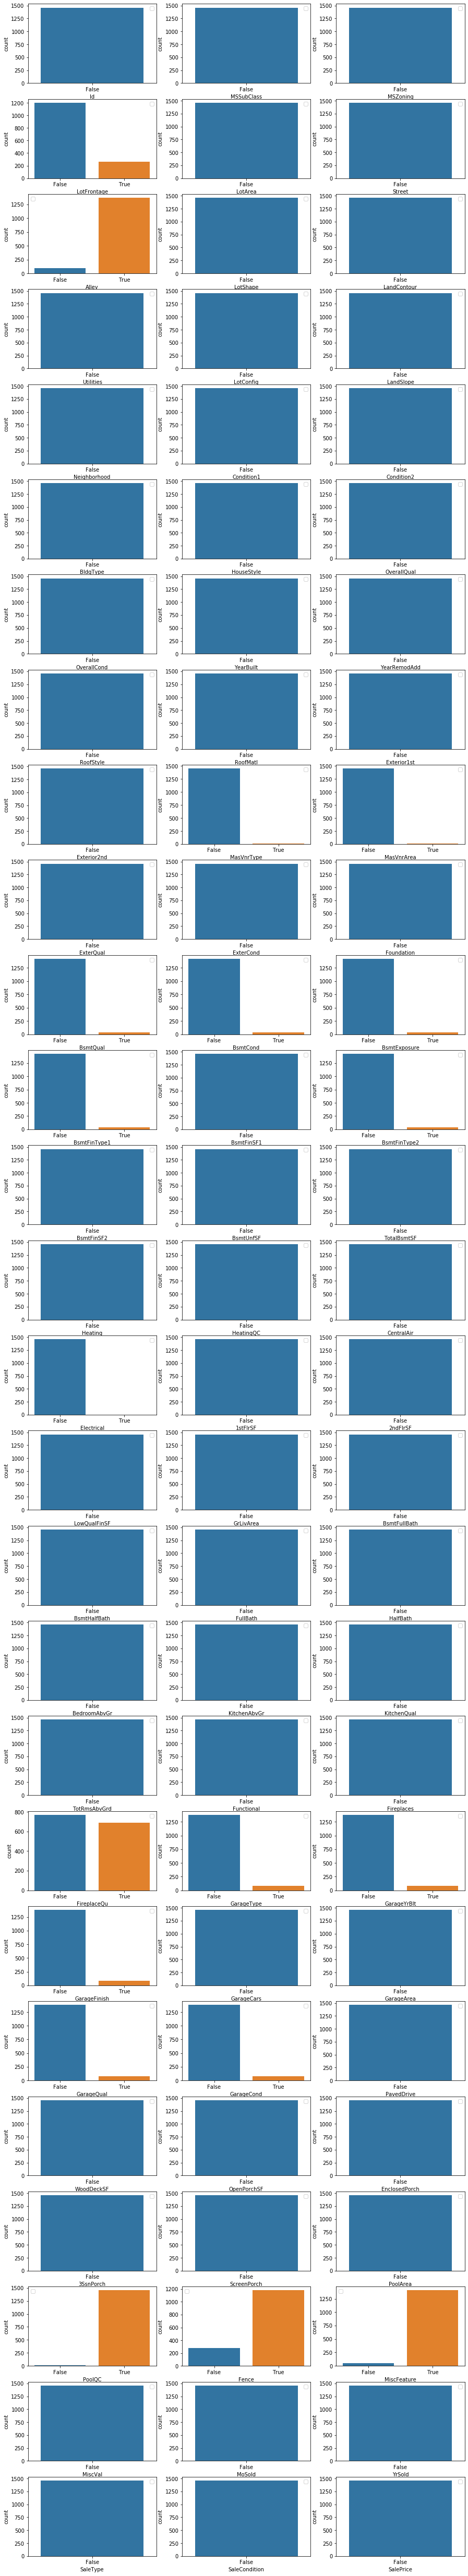

In [14]:
cplotnull(TRAIN_DATA,TRAIN_COL)

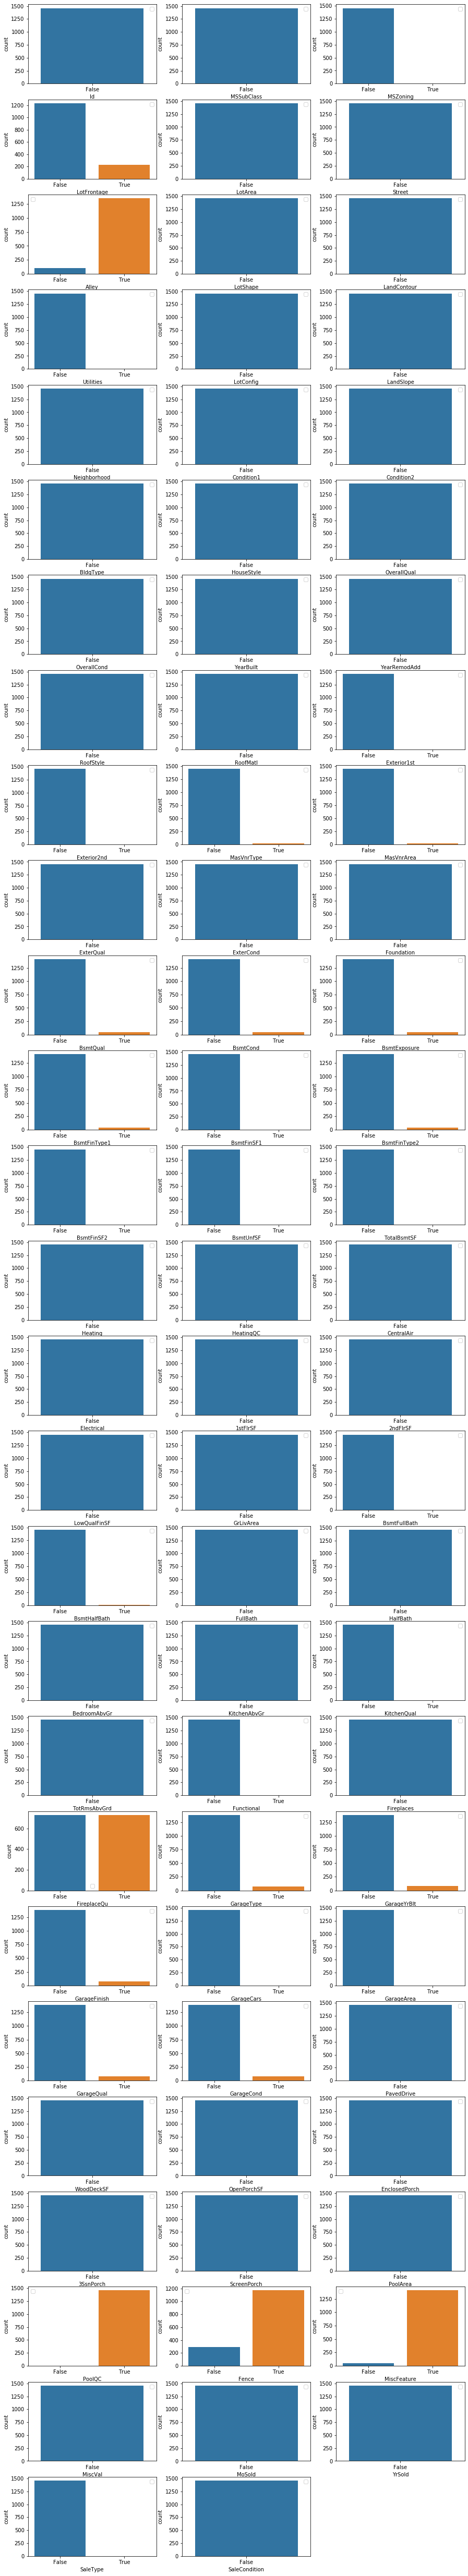

In [15]:
cplotnull(TEST_DATA,TEST_COL)

### THE FUNCTION BELOW REPLACES THE NULL VALUES FROM GIVEN DATASET  

In [16]:
def removing_null_vals(dataset,COL):
    NULL_COL=list()
    CLEAN_COL=list()
    for i in COL:
        if dataset[i].isnull().sum() > 0:
            NULL_COL.append(i)
        else:
            CLEAN_COL.append(i)    
    for i in NULL_COL:
        print(i," : ",dataset[i].isnull().sum(),"/",dataset[i].count())
    NULL_DATA=dataset[NULL_COL]                                             #NULL_DATA=ALL COLUMNS WITH NULL VALUES
    NULL_MEDIAN=NULL_DATA.isnull().sum().median()                           #CALCULATING MEDIAN OF NUMBER OF NULLS
    NULL_LESS=[i for i in NULL_COL if dataset[i].isnull().sum()<=NULL_MEDIAN] #LESS NUMBER OF NULL VALUES
    CAT_COLS=dataset[NULL_LESS].select_dtypes(include=['object']).columns.tolist() #CATEGORICAL NULL COLUMNS
    NUM_COLS=[i for i in NULL_LESS if i not in CAT_COLS] #NUMERICAL COLUMNS THAT POSSIBLY HAVE LESS NUMBER OF NULL VALUES
    NULL_MORE=[i for i in NULL_COL if i not in NULL_LESS] # NULL_MORE=COLUMNS WITH HIGH AMOUNT OF NULLS THAT CANT BE TREATED SIMPLY
    for i in range(0,len(NUM_COLS)): # REPLACING NUMERICAL NULLS WITH MEAN
        dataset[NUM_COLS[i]]=dataset[NUM_COLS[i]].replace({np.nan:dataset.mean()[NUM_COLS[i]]})
    MODE=dataset.mode().iloc[0:1,:]
    for i in range(0,len(CAT_COLS)): # REPLACING CATEGORICAL NULLS WITH THE MOST FREQUENT LABELS
        dataset[CAT_COLS[i]]=dataset[CAT_COLS[i]].replace({np.nan:MODE[CAT_COLS[i]][0]})
    NULL_DATA=NULL_DATA[NULL_MORE]  # STORING UNTREATED LARGE AMOUNT OF NULL VALUES
    dataset=dataset.drop(axis=1,columns=NULL_MORE) # DROPPING THE COLUMNS WITH HUGE AMOUNT OF NULLS
    return dataset,NULL_DATA

In [17]:
TRAIN_DATA,NULLARGE_TRAIN=removing_null_vals(TRAIN_DATA,TRAIN_COL)
TRAIN_DATA

LotFrontage  :  259 / 1201
Alley  :  1369 / 91
MasVnrType  :  8 / 1452
MasVnrArea  :  8 / 1452
BsmtQual  :  37 / 1423
BsmtCond  :  37 / 1423
BsmtExposure  :  38 / 1422
BsmtFinType1  :  37 / 1423
BsmtFinType2  :  38 / 1422
Electrical  :  1 / 1459
FireplaceQu  :  690 / 770
GarageType  :  81 / 1379
GarageYrBlt  :  81 / 1379
GarageFinish  :  81 / 1379
GarageQual  :  81 / 1379
GarageCond  :  81 / 1379
PoolQC  :  1453 / 7
Fence  :  1179 / 281
MiscFeature  :  1406 / 54


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
TEST_DATA,NULLARGE_TEST=removing_null_vals(TEST_DATA,TEST_COL)

MSZoning  :  4 / 1455
LotFrontage  :  227 / 1232
Alley  :  1352 / 107
Utilities  :  2 / 1457
Exterior1st  :  1 / 1458
Exterior2nd  :  1 / 1458
MasVnrType  :  16 / 1443
MasVnrArea  :  15 / 1444
BsmtQual  :  44 / 1415
BsmtCond  :  45 / 1414
BsmtExposure  :  44 / 1415
BsmtFinType1  :  42 / 1417
BsmtFinSF1  :  1 / 1458
BsmtFinType2  :  42 / 1417
BsmtFinSF2  :  1 / 1458
BsmtUnfSF  :  1 / 1458
TotalBsmtSF  :  1 / 1458
BsmtFullBath  :  2 / 1457
BsmtHalfBath  :  2 / 1457
KitchenQual  :  1 / 1458
Functional  :  2 / 1457
FireplaceQu  :  730 / 729
GarageType  :  76 / 1383
GarageYrBlt  :  78 / 1381
GarageFinish  :  78 / 1381
GarageCars  :  1 / 1458
GarageArea  :  1 / 1458
GarageQual  :  78 / 1381
GarageCond  :  78 / 1381
PoolQC  :  1456 / 3
Fence  :  1169 / 290
MiscFeature  :  1408 / 51
SaleType  :  1 / 1458


In [19]:
TRAIN_DATA.isnull().sum().sum()

0

In [20]:
TEST_DATA.isnull().sum().sum()

0

In [21]:
TRAIN_COL=TRAIN_DATA.columns
TEST_COL=TEST_DATA.columns

In [22]:
len(TRAIN_COL)

75

In [23]:
len(TEST_COL)

64

In [24]:
COM_COLS=[i for i in TEST_COL if i in TRAIN_COL]
COM_COLS

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [25]:
len(COM_COLS)

64

### WE OBSERVE NOT ALL COLUMNS ARE COMMON BETWEEN THE CLEANED DATASETS

### DIVIDING COLUMNS AS PER THE STATISTICAL DATA TYPES

In [26]:
ORD_COLS=['Id']
NOM_COLS=['Id']
NUM_COLS=['Id']
for i in TRAIN_COL:
        print(i," - ",len(TRAIN_DATA[i].unique()))
for i in TRAIN_COL:   # As per the description of data the maximum no. of categorical labels are in Neighborhood ie. 25 hence
    IUN=list(pd.unique(TRAIN_DATA[i]))
    if len(IUN)<=25 :
            if 'Gd' in IUN or 'GLQ' in IUN or i in ['OverallQual','OverallCond']:
                ORD_COLS.append(i)  # storing ordinal categorical data
            else:
                NOM_COLS.append(i) # storing nominal categorical data
    else:
            NUM_COLS.append(i) # storing numerical continuous data

Id  -  1460
MSSubClass  -  15
MSZoning  -  5
LotArea  -  1073
Street  -  2
LotShape  -  4
LandContour  -  4
Utilities  -  2
LotConfig  -  5
LandSlope  -  3
Neighborhood  -  25
Condition1  -  9
Condition2  -  8
BldgType  -  5
HouseStyle  -  8
OverallQual  -  10
OverallCond  -  9
YearBuilt  -  112
YearRemodAdd  -  61
RoofStyle  -  6
RoofMatl  -  8
Exterior1st  -  15
Exterior2nd  -  16
MasVnrType  -  4
MasVnrArea  -  328
ExterQual  -  4
ExterCond  -  5
Foundation  -  6
BsmtQual  -  4
BsmtCond  -  4
BsmtExposure  -  4
BsmtFinType1  -  6
BsmtFinSF1  -  637
BsmtFinType2  -  6
BsmtFinSF2  -  144
BsmtUnfSF  -  780
TotalBsmtSF  -  721
Heating  -  6
HeatingQC  -  5
CentralAir  -  2
Electrical  -  5
1stFlrSF  -  753
2ndFlrSF  -  417
LowQualFinSF  -  24
GrLivArea  -  861
BsmtFullBath  -  4
BsmtHalfBath  -  3
FullBath  -  4
HalfBath  -  3
BedroomAbvGr  -  8
KitchenAbvGr  -  4
KitchenQual  -  4
TotRmsAbvGrd  -  12
Functional  -  7
Fireplaces  -  4
GarageType  -  6
GarageYrBlt  -  98
GarageFinish  - 

In [27]:
NUM_COLS

['Id',
 'Id',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [28]:
NOM_COLS

['Id',
 'MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [29]:
ORD_COLS

['Id',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageQual',
 'GarageCond']

In [30]:
NUM_COLS=set(NUM_COLS) # MIGHT HAVE EXTRA IDS

## EXPLORING THE CORRELATIONS AND PATTERN THROUGH PAIRPLOT

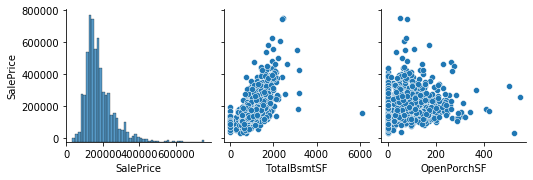

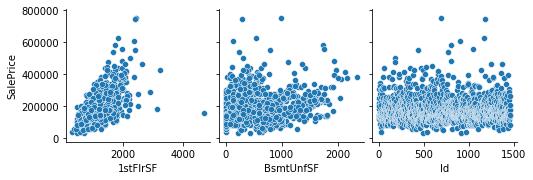

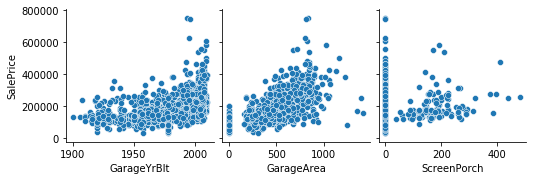

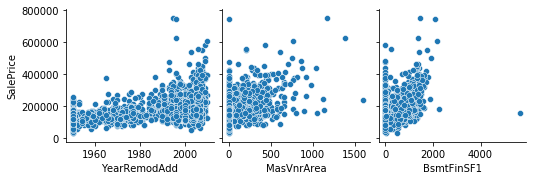

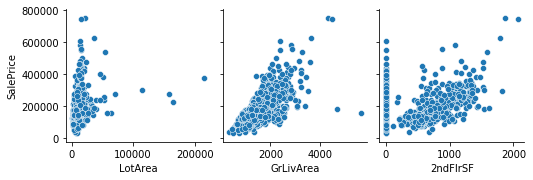

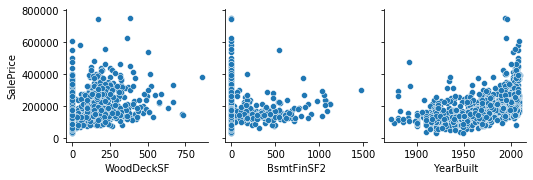

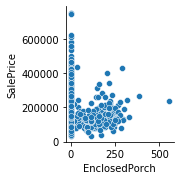

In [31]:
for i in range(0,len(NUM_COLS),3): # plottiing numerical columns for observing the correlation and pattern of data
    sns.pairplot(TRAIN_DATA,x_vars=list(NUM_COLS)[i:i+3],y_vars='SalePrice')

### CALCULATING THE NUMERICAL CORRELATIONS

In [32]:
NUMCORR=abs(TRAIN_DATA[NUM_COLS].corr()['SalePrice']).sort_values(ascending=False) # STORING CORRELATION OF NUMERICAL COLUMNS

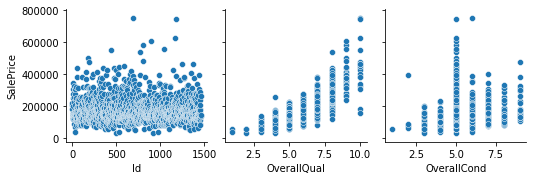

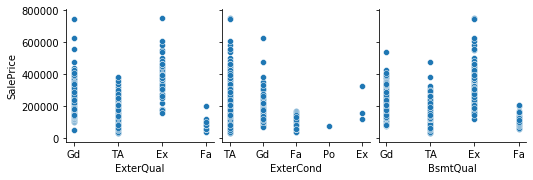

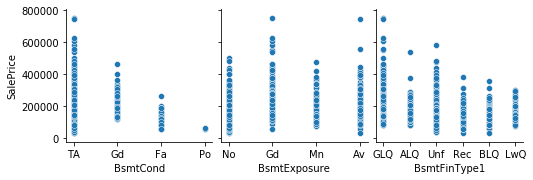

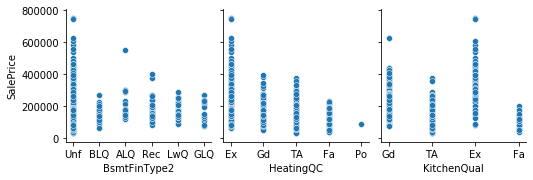

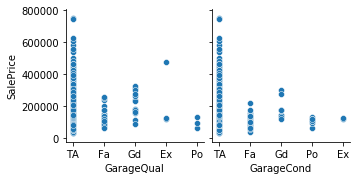

In [33]:
for i in range(0,15,3): #plotting categorical ordinals
    sns.pairplot(TRAIN_DATA,x_vars=list(ORD_COLS)[i:i+3],y_vars='SalePrice')

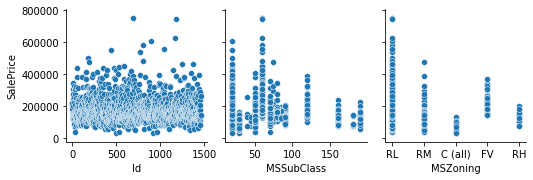

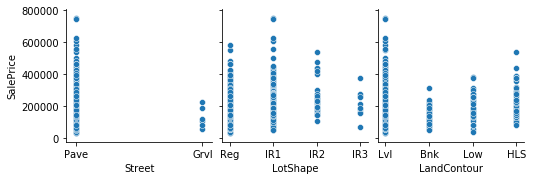

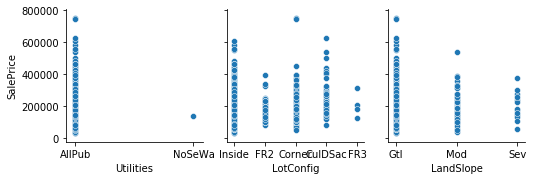

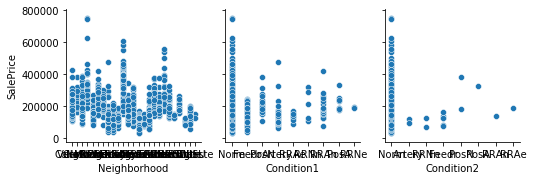

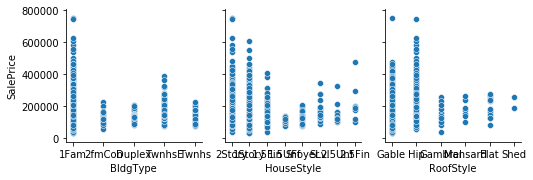

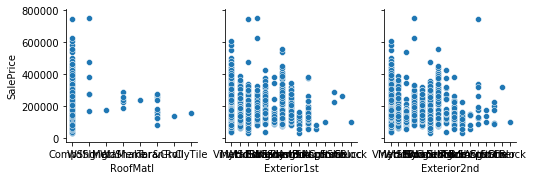

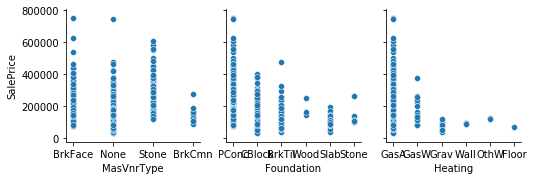

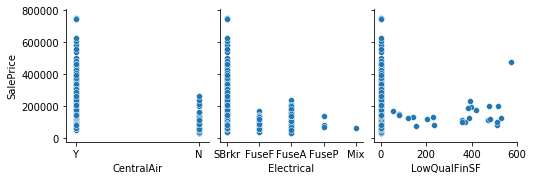

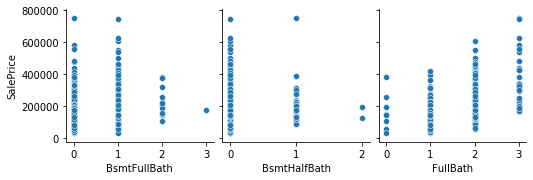

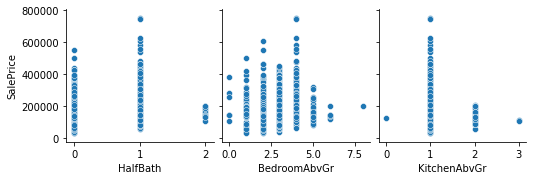

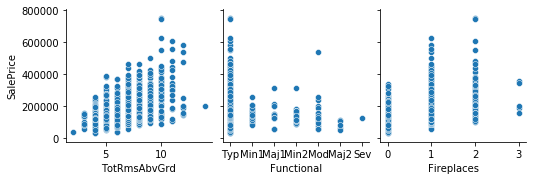

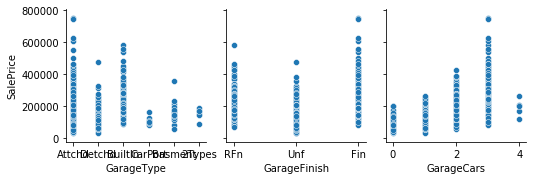

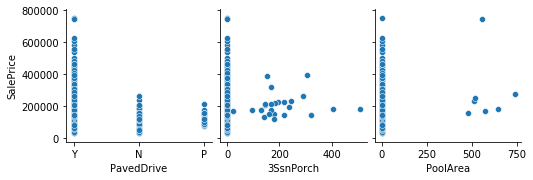

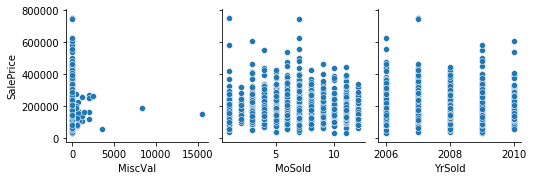

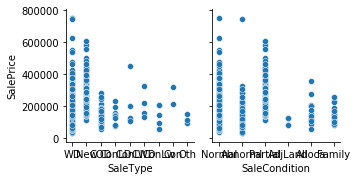

In [34]:
for i in range(0,len(NOM_COLS)+1,3): # plotting categorical nominals
    sns.pairplot(TRAIN_DATA,x_vars=list(NOM_COLS)[i:i+3],y_vars='SalePrice')

### CALCULATING CATEGORICAL CORRELATIONS 

In [35]:
CAT_CORR=["OverallQual",'OverallCond','ExterCond','HeatingQC','BsmtCond','BsmtFinType1','BsmtFinType2','GarageQual','GarageCond','MSSubClass','MSZoning','LandSlope','Neighborhood','Condition1','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','Heating','Foundation','BsmtHalfBath','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','PavedDrive','Electrical','GarageType']
# ABOVE CATEGORICAL COLUMNS ARE CHOSEN ON BASIS OF THE ANALYSIS OF PAIRPLOTS

In [36]:
#THIS FUNCTION IS USED TO IDENTIFY CORRELATION BETWEEN SALEPRICE AND THE CATEGORICAL VARIABLES CALLED ETA
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

### FEATURE SELECTION ACCORDING TO CORRELATION

In [37]:
k=1
CATCORR=dict()     # A DICTIONARY TO STORE COLUMNS AND CORRESPONDIG CORRELATION
CATCOL=NOM_COLS+ORD_COLS  # STORING ALL TYPES OF CATEGORIES
CATCOL=set(CATCOL)  # INCASE OF REPITITION OF ID
for i in CATCOL:    # STORING CORRELATION FOR CATEGORICAL VALUES
    a=correlation_ratio(TRAIN_DATA[i].values,TRAIN_DATA["SalePrice"].values)
    print(i," -- ",a)
    CATCORR[i]=a
    k+=1
CATCORR=pd.Series(CATCORR)          # CONVERTING TO SERIES TO GET A SORTED LIST EASILY
CATCORR=CATCORR.sort_values(ascending=False)   # SORTING
CORR=NUMCORR.append(CATCORR).sort_values(ascending=False)  #CORR= SORTED FINAL LIST WITH ALL CORRELATIONS 
FIN_COL=list() 
for index,value in CORR.items():   # STORING THOSE VALUES IN FINAL COLUMNS WITH EITHER CORRELATION>1 OR A PATTERN CAN BE OBSERVED IN PAIRPLOT
    if value>0.1 or index in CAT_CORR: 
        FIN_COL.append(index)
FIN_COL

GarageFinish  --  0.5423751603622962
MasVnrType  --  0.42810849361371794
BsmtFinType1  --  0.44178020121086214
MSSubClass  --  0.49630229983102675
Functional  --  0.128375954607555
Exterior2nd  --  0.39221149922589343
RoofMatl  --  0.17723747640844897
BsmtQual  --  0.6784602986219068
Exterior1st  --  0.3908620257099605
SaleType  --  0.37052326104924094
ExterQual  --  0.6909325420958304
LotConfig  --  0.1449805660703004
OverallCond  --  0.3541046675254033
PoolArea  --  0.19092506144377822
ExterCond  --  0.15368025465904525
Id  --  1.0
Neighborhood  --  0.7386304832658636
GarageQual  --  0.15074082853949541
Fireplaces  --  0.48182780608487946
MiscVal  --  0.1163931098093695
YrSold  --  0.04208914368306475
BsmtFinType2  --  0.09028696262010577
BsmtHalfBath  --  0.017432820196084203
GarageCars  --  0.7008769433945898
BsmtFullBath  --  0.23136057754944606
LowQualFinSF  --  0.13600730470650166
FullBath  --  0.5800282050936391
Condition1  --  0.1806395304453634
KitchenAbvGr  --  0.14093605447

['SalePrice',
 'Id',
 'OverallQual',
 'Neighborhood',
 'GrLivArea',
 'GarageCars',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageFinish',
 'YearBuilt',
 'YearRemodAdd',
 'Foundation',
 'MSSubClass',
 'Fireplaces',
 'MasVnrArea',
 'GarageYrBlt',
 'HeatingQC',
 'BsmtFinType1',
 'MasVnrType',
 'GarageType',
 'Exterior2nd',
 'Exterior1st',
 'BsmtFinSF1',
 'SaleType',
 'BsmtExposure',
 'SaleCondition',
 'OverallCond',
 'MSZoning',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'HouseStyle',
 'LotShape',
 'LotArea',
 'CentralAir',
 'Electrical',
 'BedroomAbvGr',
 'RoofStyle',
 'PavedDrive',
 'BsmtFullBath',
 'BsmtUnfSF',
 'PoolArea',
 'BldgType',
 'Condition1',
 'RoofMatl',
 'BsmtCond',
 'LandContour',
 'ExterCond',
 'GarageQual',
 'GarageCond',
 'LotConfig',
 'KitchenAbvGr',
 'LowQualFinSF',
 'EnclosedPorch',
 'Functional',
 'Heating',
 'MiscVal',
 '3SsnPorch',
 'ScreenPorch',
 'BsmtFinType2',
 'LandSl

In [38]:
len(FIN_COL)

69

In [39]:
TRAIN_SELECT=TRAIN_DATA[FIN_COL] # TRAIN_SELECT = SELECTED FEATURES/COLUMNS 

In [40]:
TRAIN_SELECT # STORES CLEAN TRAIN DATA WITH FEATURES OF SIGNIFICANT CORRELATION

,SalePrice,Id,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,...,LowQualFinSF,EnclosedPorch,Functional,Heating,MiscVal,3SsnPorch,ScreenPorch,BsmtFinType2,LandSlope,BsmtHalfBath
0,208500,1,7,CollgCr,1710,2,Gd,Gd,Gd,548,...,0,0,Typ,GasA,0,0,0,Unf,Gtl,0
1,181500,2,6,Veenker,1262,2,TA,Gd,TA,460,...,0,0,Typ,GasA,0,0,0,Unf,Gtl,1
2,223500,3,7,CollgCr,1786,2,Gd,Gd,Gd,608,...,0,0,Typ,GasA,0,0,0,Unf,Gtl,0
3,140000,4,7,Crawfor,1717,3,TA,TA,Gd,642,...,0,272,Typ,GasA,0,0,0,Unf,Gtl,0
4,250000,5,8,NoRidge,2198,3,Gd,Gd,Gd,836,...,0,0,Typ,GasA,0,0,0,Unf,Gtl,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1456,6,Gilbert,1647,2,TA,Gd,TA,460,...,0,0,Typ,GasA,0,0,0,Unf,Gtl,0
1456,210000,1457,6,NWAmes,2073,2,TA,Gd,TA,500,...,0,0,Min1,GasA,0,0,0,Rec,Gtl,0
1457,266500,1458,7,Crawfor,2340,1,Ex,TA,Gd,252,...,0,0,Typ,GasA,2500,0,0,Unf,Gtl,0
1458,142125,1459,5,NAmes,1078,1,TA,TA,Gd,240,...,0,112,Typ,GasA,0,0,0,Rec,Gtl,0


In [41]:
COM_COLS=[i for i in TEST_COL if i in FIN_COL] # COMMON SELECTED FEATURES
len(COM_COLS)

58

### TREATING CATEGORICAL VALUES AND TURNING THEM TO NUMBERS IN ORDER TO FEED THEM TO THE MODEL

In [42]:
def treat_cat_vals(T_DATA,O_COL,N_COL,NUMFIN):
    from sklearn.preprocessing import LabelEncoder # LABEL ENCODING THE ORDINAL DATA
    LE=LabelEncoder()
    X=T_DATA.loc[:,O_COL].values            # STORING IN ARRAY KIND OF STRUCTURE X
    for i in range(1,len(O_COL)-1):
        X[:,i]=LE.fit_transform(X[:,i])         
    X[:,-1]=LE.fit_transform(X[:,-1])
    O_DATA=pd.DataFrame(data=X,columns=O_COL[:])
    O_DATA.loc[:,'Id']=pd.Series(T_DATA.loc[:O_DATA.shape[0],'Id'])
    for i in range(1,len(N_COL)):                    # ENCODING WITH THE PROBABILITY OF THE LABEL
            ILIST=list(np.array(T_DATA[N_COL[i]])) 
            IUN=pd.unique(T_DATA.loc[:,N_COL[i]])
            D=dict()
            for j in IUN:
                D[j]=ILIST.count(j)/T_DATA.shape[0]
            T_DATA.loc[:,N_COL[i]]=T_DATA.loc[:,N_COL[i]].replace(D)
    N_COL=N_COL+NUMFIN                              # COMBINING NOMINAL AND CONTINUOUS COLUMNS                             
    N_COL=set(N_COL)
    DATA=T_DATA.loc[:,N_COL]                     # SELECTING ALL COULMNS EXCEPT ORDINAL
    DATA=DATA.set_index('Id')   # SETTING INDEX TO ID INORDER TO PERFORM EQUIJOIN
    READY_DATA=DATA.join(O_DATA.set_index('Id'))
    READY_DATA=READY_DATA.convert_dtypes(infer_objects=True) # MAKING DATA TYPE ENABLE TO THE LINEAR MODEL
    return READY_DATA

In [43]:
O_COL=[i for i in FIN_COL if i in ORD_COLS]
N_COL=[i for i in FIN_COL if i in NOM_COLS]
NUMFIN=[i for i in FIN_COL if i in NUM_COLS]

In [44]:
O_COL

['Id',
 'OverallQual',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'HeatingQC',
 'BsmtFinType1',
 'BsmtExposure',
 'OverallCond',
 'BsmtCond',
 'ExterCond',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2']

In [45]:
N_COL

['Id',
 'Neighborhood',
 'GarageCars',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageFinish',
 'Foundation',
 'MSSubClass',
 'Fireplaces',
 'MasVnrType',
 'GarageType',
 'Exterior2nd',
 'Exterior1st',
 'SaleType',
 'SaleCondition',
 'MSZoning',
 'HalfBath',
 'HouseStyle',
 'LotShape',
 'CentralAir',
 'Electrical',
 'BedroomAbvGr',
 'RoofStyle',
 'PavedDrive',
 'BsmtFullBath',
 'PoolArea',
 'BldgType',
 'Condition1',
 'RoofMatl',
 'LandContour',
 'LotConfig',
 'KitchenAbvGr',
 'LowQualFinSF',
 'Functional',
 'Heating',
 'MiscVal',
 '3SsnPorch',
 'LandSlope',
 'BsmtHalfBath']

In [46]:
NUMFIN

['SalePrice',
 'Id',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'GarageYrBlt',
 'BsmtFinSF1',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'LotArea',
 'BsmtUnfSF',
 'EnclosedPorch',
 'ScreenPorch']

In [47]:
READY_DATA=treat_cat_vals(TRAIN_SELECT,O_COL,N_COL,NUMFIN)

In [48]:
READY_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GarageFinish   1460 non-null   float64
 1   MasVnrType     1460 non-null   float64
 2   SalePrice      1460 non-null   Int64  
 3   MSSubClass     1460 non-null   float64
 4   Functional     1460 non-null   float64
 5   TotalBsmtSF    1460 non-null   Int64  
 6   Exterior2nd    1460 non-null   float64
 7   RoofMatl       1460 non-null   float64
 8   OpenPorchSF    1460 non-null   Int64  
 9   1stFlrSF       1460 non-null   Int64  
 10  Exterior1st    1460 non-null   float64
 11  SaleType       1460 non-null   float64
 12  LotConfig      1460 non-null   float64
 13  PoolArea       1460 non-null   float64
 14  BsmtUnfSF      1460 non-null   Int64  
 15  Neighborhood   1460 non-null   float64
 16  GarageYrBlt    1460 non-null   float64
 17  Fireplaces     1460 non-null   float64
 18  MiscVal 

In [49]:
len(TEST_DATA.columns)

64

In [50]:
len(READY_DATA.columns)

68

In [51]:
A=[i for i in READY_DATA.columns if i not in TEST_DATA.columns]
READY_DATA[A]

,GarageFinish,SalePrice,GarageYrBlt,GarageType,BsmtQual,BsmtFinType1,BsmtExposure,BsmtCond,GarageQual,GarageCond,BsmtFinType2
Id,,,,,,,,,,,
1,0.289041,208500,2003.0,0.651370,2,2,3,3,4,4,5
2,0.289041,181500,1976.0,0.651370,2,0,1,3,4,4,5
3,0.289041,223500,2001.0,0.651370,2,2,2,3,4,4,5
4,0.469863,140000,1998.0,0.265068,3,0,3,1,4,4,5
5,0.289041,250000,2000.0,0.651370,2,2,0,3,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...
1456,0.289041,175000,1999.0,0.651370,2,5,3,3,4,4,5
1457,0.469863,210000,1978.0,0.651370,2,0,3,3,4,4,4
1458,0.289041,266500,1941.0,0.651370,3,2,3,1,4,4,5


In [52]:
TEST_DATA.columns[:30]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2'],
      dtype='object')

In [53]:
TEST_DATA.isnull().sum().sum()

0

In [54]:
O_COL=[i for i in ORD_COLS if i in TEST_DATA.columns and i in FIN_COL]
N_COL=[i for i in NOM_COLS if i in TEST_DATA.columns and i in FIN_COL]
NUMFIN=[i for i in NUM_COLS if i in TEST_DATA.columns and i in FIN_COL]
TEST_DATA=treat_cat_vals(TEST_DATA,O_COL,N_COL,NUMFIN)

In [55]:
len(TEST_DATA.columns)

57

In [56]:
X_val=list(READY_DATA.columns)
X_val.remove('SalePrice')

In [57]:
NC=[i for i in X_val if i in NUM_COLS]
NC

['TotalBsmtSF',
 'OpenPorchSF',
 '1stFlrSF',
 'BsmtUnfSF',
 'GarageYrBlt',
 'GarageArea',
 'ScreenPorch',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotArea',
 'GrLivArea',
 '2ndFlrSF',
 'WoodDeckSF',
 'YearBuilt',
 'EnclosedPorch']

In [58]:
READY_DATA

,GarageFinish,MasVnrType,SalePrice,MSSubClass,Functional,TotalBsmtSF,Exterior2nd,RoofMatl,OpenPorchSF,1stFlrSF,...,KitchenQual,HeatingQC,BsmtFinType1,BsmtExposure,OverallCond,BsmtCond,ExterCond,GarageQual,GarageCond,BsmtFinType2
Id,,,,,,,,,,,,,,,,,,,,,
1,0.289041,0.304795,208500,0.204795,0.931507,856,0.345205,0.982192,61,856,...,2,0,2,3,4,3,4,4,4,5
2,0.289041,0.597260,181500,0.367123,0.931507,1262,0.146575,0.982192,0,1262,...,3,0,0,1,7,3,4,4,4,5
3,0.289041,0.304795,223500,0.204795,0.931507,920,0.345205,0.982192,42,920,...,2,0,2,2,4,3,4,4,4,5
4,0.469863,0.597260,140000,0.041096,0.931507,756,0.026027,0.982192,35,961,...,2,2,0,3,4,1,4,4,4,5
5,0.289041,0.304795,250000,0.204795,0.931507,1145,0.345205,0.982192,84,1145,...,2,0,2,0,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.289041,0.597260,175000,0.204795,0.931507,953,0.345205,0.982192,40,953,...,3,0,5,3,4,3,4,4,4,5
1457,0.469863,0.087671,210000,0.367123,0.021233,1542,0.097260,0.982192,0,2073,...,3,4,0,3,5,3,4,4,4,4
1458,0.289041,0.597260,266500,0.041096,0.931507,1152,0.041096,0.982192,60,1188,...,2,0,2,3,8,1,2,4,4,5


In [59]:
NC.remove('YearBuilt')
NC.remove('YearRemodAdd')
NC.append('SalePrice')
NC.remove('GarageYrBlt')

### SCALING THE NUMERICAL CONTINUOUS FEATURES

In [60]:
def featurescaling(dataset,NC,C):
    from sklearn.preprocessing import MinMaxScaler
    mmscaler=MinMaxScaler(feature_range=(0,10))
    DATA=dataset.loc[:,NC]
    DATA=mmscaler.fit_transform(DATA)
    DATA=pd.DataFrame(DATA,columns=NC)
    DATA[C]=dataset.index
    return DATA
TRAIN_NUM_DATA=featurescaling(READY_DATA,NC,'Id')
NC=[i for i in NC if i in TEST_DATA.columns]
TEST_NUM_DATA=featurescaling(TEST_DATA,NC,'Id')

In [61]:
TRAIN_NUM_DATA.set_index('Id')

,TotalBsmtSF,OpenPorchSF,1stFlrSF,BsmtUnfSF,GarageArea,ScreenPorch,MasVnrArea,BsmtFinSF1,LotArea,GrLivArea,2ndFlrSF,WoodDeckSF,EnclosedPorch,SalePrice
Id,,,,,,,,,,,,,,
1,1.400982,1.115174,1.197797,0.642123,3.864598,0.0,1.22500,1.250886,0.334198,2.592313,4.135593,0.000000,0.000000,2.410776
2,2.065466,0.000000,2.129417,1.215753,3.244006,0.0,0.00000,1.732814,0.387950,1.748304,0.000000,3.477246,0.000000,2.035828
3,1.505728,0.767824,1.344654,1.857877,4.287729,0.0,1.01250,0.861091,0.465073,2.735494,4.193705,0.000000,0.000000,2.619081
4,1.237316,0.639854,1.438733,2.311644,4.527504,0.0,0.00000,0.382707,0.385613,2.605501,3.661017,0.000000,4.927536,1.459520
5,1.873977,1.535649,1.860945,2.097603,5.895628,0.0,2.18750,1.160524,0.605763,3.511680,5.099274,2.240373,0.000000,2.987085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1.559738,0.731261,1.420376,4.079623,3.244006,0.0,0.00000,0.000000,0.309285,2.473625,3.360775,0.000000,0.000000,1.945563
1457,2.523732,0.000000,3.990363,2.521404,3.526093,0.0,0.74375,1.399717,0.555049,3.276187,0.000000,4.072345,0.000000,2.431607
1458,1.885434,1.096892,1.959615,3.754281,1.777151,0.0,0.00000,0.487243,0.361869,3.779201,5.578692,0.000000,0.000000,3.216220


In [62]:
TEST_NUM_DATA.set_index('Id')

,TotalBsmtSF,OpenPorchSF,1stFlrSF,BsmtUnfSF,GarageArea,ScreenPorch,MasVnrArea,BsmtFinSF1,LotArea,GrLivArea,2ndFlrSF,WoodDeckSF,EnclosedPorch
Id,,,,,,,,,,,,,
1461,1.731109,0.000000,1.043089,1.261682,4.905914,2.083333,0.000000,1.167082,1.841466,1.043089,0.000000,0.983146,0.0
1462,2.608440,0.485175,1.966724,1.897196,2.096774,0.000000,0.837209,2.301746,2.321241,1.966724,0.000000,2.759831,0.0
1463,1.821394,0.458221,1.111348,0.640187,3.239247,0.000000,0.000000,1.972569,2.241974,2.606655,3.764769,1.488764,0.0
1464,1.817468,0.485175,1.107082,1.514019,3.158602,0.000000,0.155039,1.501247,1.543261,2.553328,3.641246,2.528090,0.0
1465,2.512267,1.105121,1.862201,4.752336,3.400538,2.500000,0.000000,0.655860,0.641212,1.862201,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1.071639,0.000000,0.296502,2.551402,0.000000,0.000000,0.000000,0.000000,0.084527,1.461177,2.932331,0.000000,0.0
2916,1.071639,0.323450,0.296502,1.373832,1.922043,0.000000,0.000000,0.628429,0.076909,1.461177,2.932331,0.000000,0.0
2917,2.402355,0.000000,1.742747,0.000000,3.870968,0.000000,0.000000,3.052369,3.361146,1.742747,0.000000,3.328652,0.0


In [63]:
NC

['TotalBsmtSF',
 'OpenPorchSF',
 '1stFlrSF',
 'BsmtUnfSF',
 'GarageArea',
 'ScreenPorch',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotArea',
 'GrLivArea',
 '2ndFlrSF',
 'WoodDeckSF',
 'EnclosedPorch']

In [64]:
READY_DATA.columns

Index(['GarageFinish', 'MasVnrType', 'SalePrice', 'MSSubClass', 'Functional',
       'TotalBsmtSF', 'Exterior2nd', 'RoofMatl', 'OpenPorchSF', '1stFlrSF',
       'Exterior1st', 'SaleType', 'LotConfig', 'PoolArea', 'BsmtUnfSF',
       'Neighborhood', 'GarageYrBlt', 'Fireplaces', 'MiscVal', 'GarageArea',
       'ScreenPorch', 'BsmtHalfBath', 'YearRemodAdd', 'GarageCars',
       'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Condition1', 'LowQualFinSF', 'MasVnrArea', 'RoofStyle', 'BsmtFinSF1',
       'LotShape', 'Heating', 'CentralAir', 'Foundation', 'LotArea',
       'PavedDrive', 'SaleCondition', 'MSZoning', 'BldgType', 'LandSlope',
       'GrLivArea', '3SsnPorch', 'LandContour', '2ndFlrSF', 'GarageType',
       'HalfBath', 'HouseStyle', 'BedroomAbvGr', 'WoodDeckSF', 'Electrical',
       'YearBuilt', 'EnclosedPorch', 'OverallQual', 'ExterQual', 'BsmtQual',
       'KitchenQual', 'HeatingQC', 'BsmtFinType1', 'BsmtExposure',
       'OverallCond', 'BsmtCond', 'ExterCond'

In [65]:
D=TEST_DATA[[i for i in TEST_DATA.columns if i not in NC]]
TESTDATA=D.join(TEST_NUM_DATA.set_index('Id'))
TESTDATA

,MasVnrType,MSSubClass,Functional,Exterior2nd,RoofMatl,Exterior1st,SaleType,LotConfig,PoolArea,Neighborhood,...,BsmtUnfSF,GarageArea,ScreenPorch,MasVnrArea,BsmtFinSF1,LotArea,GrLivArea,2ndFlrSF,WoodDeckSF,EnclosedPorch
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.612748,0.372173,0.93146,0.350240,0.988348,0.350240,0.86292,0.740918,0.995888,0.149417,...,1.261682,4.905914,2.083333,0.000000,1.167082,1.841466,1.043089,0.000000,0.983146,0.0
1462,0.297464,0.372173,0.93146,0.132968,0.988348,0.140507,0.86292,0.169979,0.995888,0.149417,...,1.897196,2.096774,0.000000,0.837209,2.301746,2.321241,1.966724,0.000000,2.759831,0.0
1463,0.612748,0.189171,0.93146,0.350240,0.988348,0.350240,0.86292,0.740918,0.995888,0.058944,...,0.640187,3.239247,0.000000,0.000000,1.972569,2.241974,2.606655,3.764769,1.488764,0.0
1464,0.297464,0.189171,0.93146,0.350240,0.988348,0.350240,0.86292,0.740918,0.995888,0.058944,...,1.514019,3.158602,0.000000,0.155039,1.501247,1.543261,2.553328,3.641246,2.528090,0.0
1465,0.612748,0.065113,0.93146,0.136395,0.988348,0.150788,0.86292,0.740918,0.995888,0.017820,...,4.752336,3.400538,2.500000,0.000000,0.655860,0.641212,1.862201,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.612748,0.044551,0.93146,0.045236,0.988348,0.044551,0.86292,0.740918,0.995888,0.013708,...,2.551402,0.000000,0.000000,0.000000,0.000000,0.084527,1.461177,2.932331,0.000000,0.0
2916,0.612748,0.044551,0.93146,0.045236,0.988348,0.044551,0.86292,0.740918,0.995888,0.013708,...,1.373832,1.922043,0.000000,0.000000,0.628429,0.076909,1.461177,2.932331,0.000000,0.0
2917,0.612748,0.372173,0.93146,0.350240,0.988348,0.350240,0.86292,0.740918,0.995888,0.044551,...,0.000000,3.870968,0.000000,0.000000,3.052369,3.361146,1.742747,0.000000,3.328652,0.0


In [66]:
TEST_DATA=TEST_DATA.drop(columns=['YearBuilt','YearRemodAdd'],axis=1)

In [67]:
READY_DATA.columns

Index(['GarageFinish', 'MasVnrType', 'SalePrice', 'MSSubClass', 'Functional',
       'TotalBsmtSF', 'Exterior2nd', 'RoofMatl', 'OpenPorchSF', '1stFlrSF',
       'Exterior1st', 'SaleType', 'LotConfig', 'PoolArea', 'BsmtUnfSF',
       'Neighborhood', 'GarageYrBlt', 'Fireplaces', 'MiscVal', 'GarageArea',
       'ScreenPorch', 'BsmtHalfBath', 'YearRemodAdd', 'GarageCars',
       'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Condition1', 'LowQualFinSF', 'MasVnrArea', 'RoofStyle', 'BsmtFinSF1',
       'LotShape', 'Heating', 'CentralAir', 'Foundation', 'LotArea',
       'PavedDrive', 'SaleCondition', 'MSZoning', 'BldgType', 'LandSlope',
       'GrLivArea', '3SsnPorch', 'LandContour', '2ndFlrSF', 'GarageType',
       'HalfBath', 'HouseStyle', 'BedroomAbvGr', 'WoodDeckSF', 'Electrical',
       'YearBuilt', 'EnclosedPorch', 'OverallQual', 'ExterQual', 'BsmtQual',
       'KitchenQual', 'HeatingQC', 'BsmtFinType1', 'BsmtExposure',
       'OverallCond', 'BsmtCond', 'ExterCond'

In [68]:
READY_DATA=READY_DATA.drop(columns=['YearBuilt', 'YearRemodAdd','GarageYrBlt'],axis=1)

In [69]:
E=READY_DATA[[i for i in READY_DATA.columns if i not in NC and i!='SalePrice' and i!='GarageYrBlt']]
TRAINDATA=E.join(TRAIN_NUM_DATA.set_index('Id'),on=E.index)
TRAINDATA

,GarageFinish,MasVnrType,MSSubClass,Functional,Exterior2nd,RoofMatl,Exterior1st,SaleType,LotConfig,PoolArea,...,GarageArea,ScreenPorch,MasVnrArea,BsmtFinSF1,LotArea,GrLivArea,2ndFlrSF,WoodDeckSF,EnclosedPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.289041,0.304795,0.204795,0.931507,0.345205,0.982192,0.352740,0.867808,0.720548,0.995205,...,3.864598,0.0,1.22500,1.250886,0.334198,2.592313,4.135593,0.000000,0.000000,2.410776
2,0.289041,0.597260,0.367123,0.931507,0.146575,0.982192,0.150685,0.867808,0.032192,0.995205,...,3.244006,0.0,0.00000,1.732814,0.387950,1.748304,0.000000,3.477246,0.000000,2.035828
3,0.289041,0.304795,0.204795,0.931507,0.345205,0.982192,0.352740,0.867808,0.720548,0.995205,...,4.287729,0.0,1.01250,0.861091,0.465073,2.735494,4.193705,0.000000,0.000000,2.619081
4,0.469863,0.597260,0.041096,0.931507,0.026027,0.982192,0.141096,0.867808,0.180137,0.995205,...,4.527504,0.0,0.00000,0.382707,0.385613,2.605501,3.661017,0.000000,4.927536,1.459520
5,0.289041,0.304795,0.204795,0.931507,0.345205,0.982192,0.352740,0.867808,0.032192,0.995205,...,5.895628,0.0,2.18750,1.160524,0.605763,3.511680,5.099274,2.240373,0.000000,2.987085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.289041,0.597260,0.204795,0.931507,0.345205,0.982192,0.352740,0.867808,0.720548,0.995205,...,3.244006,0.0,0.00000,0.000000,0.309285,2.473625,3.360775,0.000000,0.000000,1.945563
1457,0.469863,0.087671,0.367123,0.021233,0.097260,0.982192,0.073973,0.867808,0.720548,0.995205,...,3.526093,0.0,0.74375,1.399717,0.555049,3.276187,0.000000,4.072345,0.000000,2.431607
1458,0.289041,0.597260,0.041096,0.931507,0.041096,0.982192,0.041781,0.867808,0.720548,0.995205,...,1.777151,0.0,0.00000,0.487243,0.361869,3.779201,5.578692,0.000000,0.000000,3.216220


In [70]:
X_DATA=TRAINDATA[[i for i in TRAINDATA.columns if i!='SalePrice' and i in TESTDATA.columns]]
Y_DATA=TRAINDATA[['SalePrice']]

In [71]:
X_DATA

,MasVnrType,MSSubClass,Functional,Exterior2nd,RoofMatl,Exterior1st,SaleType,LotConfig,PoolArea,Neighborhood,...,BsmtUnfSF,GarageArea,ScreenPorch,MasVnrArea,BsmtFinSF1,LotArea,GrLivArea,2ndFlrSF,WoodDeckSF,EnclosedPorch
Id,,,,,,,,,,,,,,,,,,,,,
1,0.304795,0.204795,0.931507,0.345205,0.982192,0.352740,0.867808,0.720548,0.995205,0.102740,...,0.642123,3.864598,0.0,1.22500,1.250886,0.334198,2.592313,4.135593,0.000000,0.000000
2,0.597260,0.367123,0.931507,0.146575,0.982192,0.150685,0.867808,0.032192,0.995205,0.007534,...,1.215753,3.244006,0.0,0.00000,1.732814,0.387950,1.748304,0.000000,3.477246,0.000000
3,0.304795,0.204795,0.931507,0.345205,0.982192,0.352740,0.867808,0.720548,0.995205,0.102740,...,1.857877,4.287729,0.0,1.01250,0.861091,0.465073,2.735494,4.193705,0.000000,0.000000
4,0.597260,0.041096,0.931507,0.026027,0.982192,0.141096,0.867808,0.180137,0.995205,0.034932,...,2.311644,4.527504,0.0,0.00000,0.382707,0.385613,2.605501,3.661017,0.000000,4.927536
5,0.304795,0.204795,0.931507,0.345205,0.982192,0.352740,0.867808,0.032192,0.995205,0.028082,...,2.097603,5.895628,0.0,2.18750,1.160524,0.605763,3.511680,5.099274,2.240373,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.597260,0.204795,0.931507,0.345205,0.982192,0.352740,0.867808,0.720548,0.995205,0.054110,...,4.079623,3.244006,0.0,0.00000,0.000000,0.309285,2.473625,3.360775,0.000000,0.000000
1457,0.087671,0.367123,0.021233,0.097260,0.982192,0.073973,0.867808,0.720548,0.995205,0.050000,...,2.521404,3.526093,0.0,0.74375,1.399717,0.555049,3.276187,0.000000,4.072345,0.000000
1458,0.597260,0.041096,0.931507,0.041096,0.982192,0.041781,0.867808,0.720548,0.995205,0.034932,...,3.754281,1.777151,0.0,0.00000,0.487243,0.361869,3.779201,5.578692,0.000000,0.000000


In [72]:
TESTDATA

,MasVnrType,MSSubClass,Functional,Exterior2nd,RoofMatl,Exterior1st,SaleType,LotConfig,PoolArea,Neighborhood,...,BsmtUnfSF,GarageArea,ScreenPorch,MasVnrArea,BsmtFinSF1,LotArea,GrLivArea,2ndFlrSF,WoodDeckSF,EnclosedPorch
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.612748,0.372173,0.93146,0.350240,0.988348,0.350240,0.86292,0.740918,0.995888,0.149417,...,1.261682,4.905914,2.083333,0.000000,1.167082,1.841466,1.043089,0.000000,0.983146,0.0
1462,0.297464,0.372173,0.93146,0.132968,0.988348,0.140507,0.86292,0.169979,0.995888,0.149417,...,1.897196,2.096774,0.000000,0.837209,2.301746,2.321241,1.966724,0.000000,2.759831,0.0
1463,0.612748,0.189171,0.93146,0.350240,0.988348,0.350240,0.86292,0.740918,0.995888,0.058944,...,0.640187,3.239247,0.000000,0.000000,1.972569,2.241974,2.606655,3.764769,1.488764,0.0
1464,0.297464,0.189171,0.93146,0.350240,0.988348,0.350240,0.86292,0.740918,0.995888,0.058944,...,1.514019,3.158602,0.000000,0.155039,1.501247,1.543261,2.553328,3.641246,2.528090,0.0
1465,0.612748,0.065113,0.93146,0.136395,0.988348,0.150788,0.86292,0.740918,0.995888,0.017820,...,4.752336,3.400538,2.500000,0.000000,0.655860,0.641212,1.862201,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.612748,0.044551,0.93146,0.045236,0.988348,0.044551,0.86292,0.740918,0.995888,0.013708,...,2.551402,0.000000,0.000000,0.000000,0.000000,0.084527,1.461177,2.932331,0.000000,0.0
2916,0.612748,0.044551,0.93146,0.045236,0.988348,0.044551,0.86292,0.740918,0.995888,0.013708,...,1.373832,1.922043,0.000000,0.000000,0.628429,0.076909,1.461177,2.932331,0.000000,0.0
2917,0.612748,0.372173,0.93146,0.350240,0.988348,0.350240,0.86292,0.740918,0.995888,0.044551,...,0.000000,3.870968,0.000000,0.000000,3.052369,3.361146,1.742747,0.000000,3.328652,0.0


In [73]:
TESTDATA.columns

Index(['MasVnrType', 'MSSubClass', 'Functional', 'Exterior2nd', 'RoofMatl',
       'Exterior1st', 'SaleType', 'LotConfig', 'PoolArea', 'Neighborhood',
       'Fireplaces', 'MiscVal', 'BsmtHalfBath', 'YearRemodAdd', 'GarageCars',
       'BsmtFullBath', 'LowQualFinSF', 'FullBath', 'Condition1',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'RoofStyle', 'LotShape', 'Heating',
       'CentralAir', 'Foundation', 'PavedDrive', 'MSZoning', 'SaleCondition',
       'BldgType', 'LandSlope', '3SsnPorch', 'LandContour', 'HalfBath',
       'HouseStyle', 'BedroomAbvGr', 'Electrical', 'YearBuilt', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual',
       'TotalBsmtSF', 'OpenPorchSF', '1stFlrSF', 'BsmtUnfSF', 'GarageArea',
       'ScreenPorch', 'MasVnrArea', 'BsmtFinSF1', 'LotArea', 'GrLivArea',
       '2ndFlrSF', 'WoodDeckSF', 'EnclosedPorch'],
      dtype='object')

In [74]:
TESTDATA=TESTDATA.drop(columns=['YearBuilt','YearRemodAdd'],axis=1)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_DATA,Y_DATA,test_size=0.25)

In [76]:
XTR=X_train
YTR=Y_train
XTE=X_test
YTE=Y_test

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
XTR.shape

(1095, 55)

Mean Squared Error 0.33626458233507533
R- SQUARED VALUE 0.711966656190516


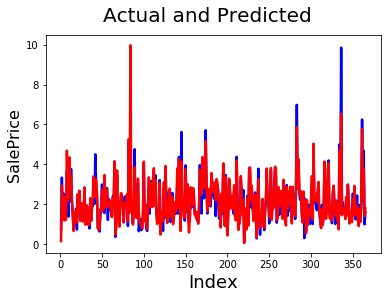

In [79]:
def LR(XTRAIN,YTRAIN,XTEST,YTEST):
    from sklearn.linear_model import LinearRegression
    lir=LinearRegression()
    lir=lir.fit(XTRAIN,YTRAIN)
    YPR=lir.predict(XTEST)
    C=lir.coef_
    I=lir.intercept_
    mse = mean_squared_error(YTEST, YPR)
    print("Mean Squared Error", mse)
    r_squared = r2_score(YTEST,YPR)
    print("R- SQUARED VALUE",r_squared)
    c = [i for i in range(1,366,1)]
    fig = plt.figure()
    plt.plot(c,YTEST, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,YPR, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('SalePrice', fontsize=16)
    return C,I,mse,lir
C,I,MSE,LIR=LR(XTR,YTR,XTE,YTE)

Mean Squared Error 0.3939933877796699
R- SQUARED VALUE 0.6625180322799411


Text(0, 0.5, 'SalePrice')

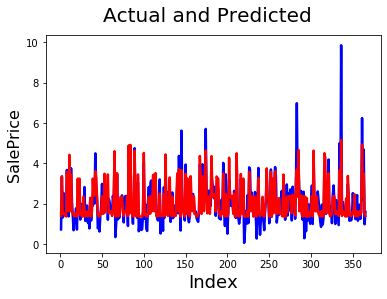

In [80]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
YTR=np.ravel(YTR,order='C')
RANFOREST=regr.fit(XTR,YTR)
y_pred = RANFOREST.predict(XTE)
y_pred=np.ravel(y_pred,order='C')
YTE=np.ravel(YTE,order='C')
mse = mean_squared_error(YTE, y_pred)
print("Mean Squared Error", mse)
r_squared = r2_score(YTE,y_pred)
print("R- SQUARED VALUE",r_squared)
c = [i for i in range(1,366,1)]
fig = plt.figure()
plt.plot(c,YTE, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('SalePrice', fontsize=16)

### ANALYZING THE MEAN SQUARED ERROR WE CAN SEE THAT MULTIPLE REGRESSION IS MORE SUITABLE TO PREDICT THE SALE PRICE

## HENCE AS THE LINEAR REGRESSION GIVES LESS ERROR WE CAN USE IT FOR PREDICTION

In [81]:
PREDICTIONS=LIR.predict(TESTDATA)

In [82]:
PREDICTIONS

array([[0.68771142],
       [0.94911637],
       [1.17477642],
       ...,
       [0.82184511],
       [0.15203149],
       [1.76722806]])